# Movie Genre Classification based on Poster Images with Convolutional Neural   Networks

# Multi Label Image Classification using CNN

# Importing libraries      

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.applications import VGG16
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import PIL 

Using TensorFlow backend.


# Load dataset
data Source: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

This dataset was collected from the IMDB website. One poster image was collected from one (mostly) Hollywood movie released from 1980 to 2015. Each poster image is associated with a movie as well as some metadata like ID, genres, and box office. The ID of each image is set as its file name.

In [5]:
data=pd.read_csv('train.csv')

In [6]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data.shape

(7254, 27)

In [8]:
# List Features
for p,q in enumerate(data):
    print(p,q)

0 Id
1 Genre
2 Action
3 Adventure
4 Animation
5 Biography
6 Comedy
7 Crime
8 Documentary
9 Drama
10 Family
11 Fantasy
12 History
13 Horror
14 Music
15 Musical
16 Mystery
17 N/A
18 News
19 Reality-TV
20 Romance
21 Sci-Fi
22 Short
23 Sport
24 Thriller
25 War
26 Western


In [9]:
print('Total no. of genres: {}'.format(len(data.columns[2:])))
print('Total no. of posters/images: {}'.format(data.Id.nunique()))
print('Total no. of genre permutations: {}'.format(data.Genre.nunique()))

Total no. of genres: 25
Total no. of posters/images: 7242
Total no. of genre permutations: 555


In [14]:
# Total counts per genre
data.sum()[2:].sort_values(ascending=False)

Drama          3619
Comedy         2900
Action         1343
Romance        1334
Crime          1176
Thriller        918
Adventure       870
Documentary     652
Horror          503
Fantasy         467
Mystery         454
Biography       441
Family          434
Sci-Fi          399
Music           305
Animation       244
History         224
Sport           221
War             144
Musical          97
Western          50
Short            46
News             21
N/A              10
Reality-TV        2
dtype: object

# Convert Images to Array

In [ ]:
img_width=350
img_height=350

X=[]

for i in  tqdm(range(data.shape[0])):
    path='/content/drive/My Drive/Movies-Poster_Dataset-master/Images/'+data['Id'][i]+'.jpg'
    img=image.load_img(path,target_size=(img_width,img_height,3))
    img=image.img_to_array(img)
    img=img/255.0
    X.append(img) 

100%|██████████| 7254/7254 [23:55<00:00,  5.05it/s]


Genre of Movie Poster 1: ['Comedy', 'Drama', 'Romance'] 
Genre of Movie Poster 2: ['Drama', 'Mystery', 'Romance']


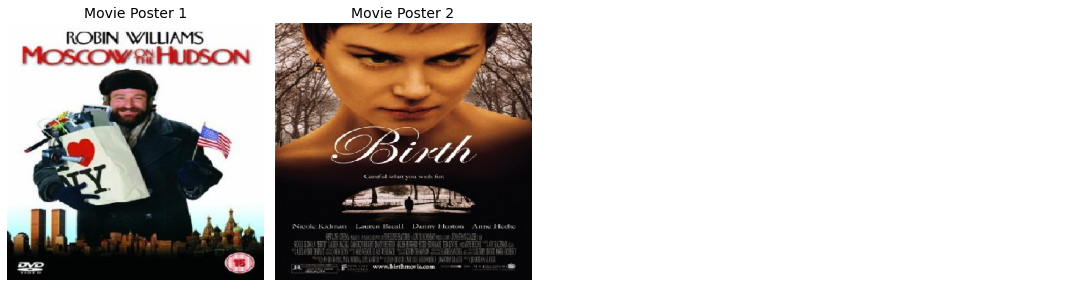

In [ ]:
# Create a generator for random indexes
poster_index = list(range(7243))
rand_index = random.sample(poster_index, 2)

# Select random posters
poster_1, poster_2 = X[rand_index[0]],X[rand_index[1]]

# Display movie poster and title
fig, ax = plt.subplots(ncols = 4, figsize=(15, 4))
ax[0].imshow(poster_1)
ax[1].imshow(poster_2)
ax[0].set_title('Movie Poster 1', fontsize=14)
ax[1].set_title('Movie Poster 2', fontsize=14)

# Remove axes
for ax in ax:
    ax.axis('off')    
plt.tight_layout()

print('Genre of Movie Poster 1: {} \nGenre of Movie Poster 2: {}'.format(data['Genre'][rand_index[0]],data['Genre'][rand_index[1]]))

# Genre Counts

Text(0.5, 1.0, 'Genre Counts')

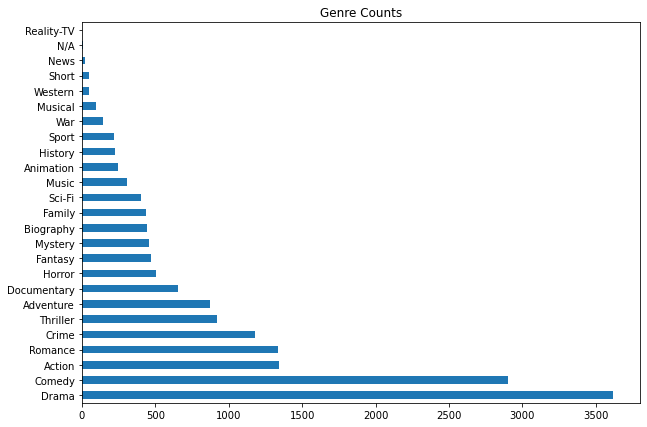

In [ ]:
# Total counts per genre
data.sum()[2:].sort_values(ascending=False).plot(kind='barh', figsize=(10,7))
plt.title('Genre Counts')

# Mutli-label Counts

Text(0.5, 0, 'No. of Categories (Genre)')

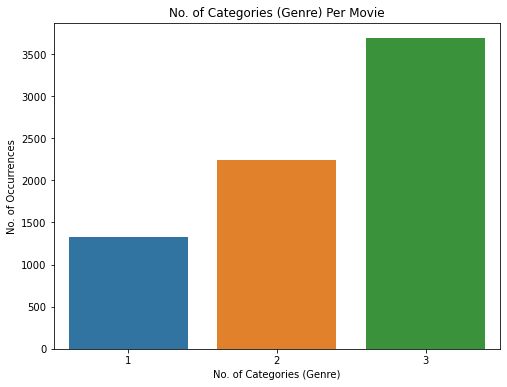

In [ ]:
# Movies with multilabels
row_sum = data.iloc[:, 2:].sum(axis=1)
x = row_sum.value_counts()

# Plot barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(x.index, x.values)
plt.title("No. of Categories (Genre) Per Movie", fontsize=12)
plt.ylabel('No. of Occurrences')
plt.xlabel('No. of Categories (Genre)')

# Data Preprocessing
Converting into array

In [ ]:
X=np.array(X)

In [ ]:
X.shape

(7254, 350, 350, 3)

In [ ]:
y=data.drop(['Id','Genre'],axis=1)
y=y.to_numpy()
y.shape

(7254, 25)

# Train/Test Split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# VGG16 MODEL

In [6]:
vgg16=VGG16()
vgg16.summary()

553467904/553467096 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [2]:
# Create the base pre-trained model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(350,350,3))

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
# unfreezing 'block5_conv1' and freezing other layers.
conv_base.trainable=True
set_trainable=False

# Freeze the conv Base
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
     layer.trainable=True
  else:
    layer.trainable=False  

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [5]:
# Create Model with Conv_base
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(23,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 10, 10, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 23)                5911      
Total params: 27,828,055
Trainable params: 20,192,791
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = myCallback()
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callbacks])

Transfer learning proved to be of little value in this multi-label problem.Training with VGG16 model overfit the model after 32 epochs it gave accuracy of 56% and validation accuracy of 33% it clearly was overfitting the model.Better is to train CNN model. 

# Building CNN Model

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25,activation='sigmoid'))
  

In [ ]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f27a71ac320>>

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 175s 28ms/sample - loss: 0.6939 - accuracy: 0.6493 - val_loss: 0.3665 - val_accuracy: 0.8792
Epoch 2/5
6165/6165 [==============================] - 173s 28ms/sample - loss: 0.3108 - accuracy: 0.8915 - val_loss: 0.2554 - val_accuracy: 0.9079
Epoch 3/5
6165/6165 [==============================] - 173s 28ms/sample - loss: 0.2622 - accuracy: 0.9061 - val_loss: 0.2558 - val_accuracy: 0.9065
Epoch 4/5
6165/6165 [==============================] - 174s 28ms/sample - loss: 0.2515 - accuracy: 0.9092 - val_loss: 0.2724 - val_accuracy: 0.9082
Epoch 5/5
6165/6165 [==============================] - 175s 28ms/sample - loss: 0.2453 - accuracy: 0.9114 - val_loss: 0.2579 - val_accuracy: 0.9076


In [ ]:
model.history.history

{'accuracy': [0.64931035, 0.89149696, 0.9061153, 0.90920347, 0.91143537],
 'loss': [0.6938785367300138,
  0.31084982018739543,
  0.26220734336950485,
  0.2515235615569406,
  0.245274024051278],
 'val_accuracy': [0.8791919, 0.9078789, 0.9065198, 0.9082093, 0.90762174],
 'val_loss': [0.36648807838162334,
  0.2553801365244597,
  0.2557578211918788,
  0.2724007358509428,
  0.2578715140716651]}

# Learning Curve Plot Function

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

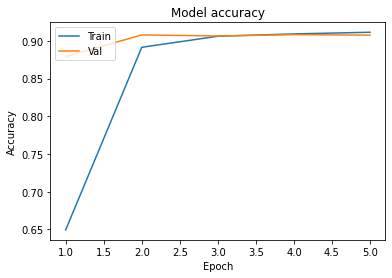

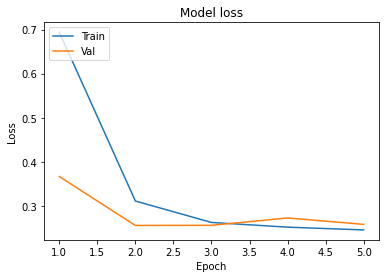

In [ ]:
plot_learningCurve(history,5)

# Testing of Model
CNN Model Predictions on Unseen Images

In [ ]:
# Create function for predicting test/unseen images & displaying results of prediction
def prediction(img_filepath, target_size=(350, 350, 3)):
    new_img = image.load_img(img_filepath, target_size=target_size)
    new_img = image.img_to_array(new_img) / 255
    
    classes = np.array(data.columns[2:])
    proba = model.predict(new_img.reshape(1,350,350,3))
    top_4 = np.argsort(proba[0])[:-5:-1]
    
    print('Genre Predictions:')
    for i in range(4):
        print('{}'.format(classes[top_4[i]])+' ({:.3})'.format(proba[0][top_4[i]]))
    plt.axis('off')
    plt.imshow(new_img)


Genre Predictions:
Drama (0.711)
Romance (0.294)
Comedy (0.2)
Crime (0.15)


Text(0.5, 1.0, 'Angrezi Medium \n Actual:Comedy | Drama ')

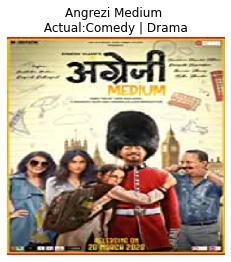

In [ ]:
prediction('eng.jpg')
plt.title('Angrezi Medium \n Actual:Comedy | Drama ')

Genre Predictions:
Drama (0.745)
Romance (0.265)
Comedy (0.135)
Crime (0.128)


Text(0.5, 1.0, 'Sadak 2\n Actual:Action | Drama')

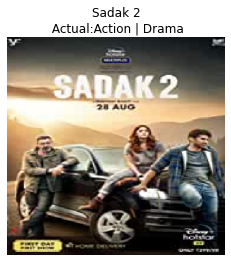

In [ ]:
prediction('sadak2.jpg')
plt.title('Sadak 2\n Actual:Action | Drama')

Genre Predictions:
Drama (0.631)
Crime (0.205)
Romance (0.184)
Action (0.184)


Text(0.5, 1.0, 'Kabir Singh \n Actual:Crime |Drama| Romance ')

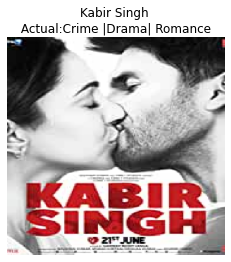

In [ ]:
prediction('kabir.jpg')
plt.title('Kabir Singh \n Actual:Crime |Drama| Romance ')

Genre Predictions:
Drama (0.702)
Romance (0.295)
Comedy (0.228)
Crime (0.145)


Text(0.5, 1.0, 'Chhichhore \n Actual:Comedy | Drama')

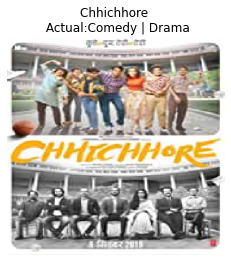

In [ ]:
prediction('chh.jpg')
plt.title('Chhichhore \n Actual:Comedy | Drama')

Genre Predictions:
Drama (0.652)
Romance (0.212)
Crime (0.189)
Action (0.178)


Text(0.5, 1.0, 'Student of the Year 2 \n Actual:Drama |Romance')

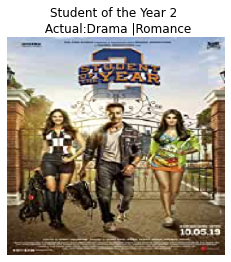

In [ ]:
prediction('year.jpg')
plt.title('Student of the Year 2 \n Actual:Drama |Romance')

Genre Predictions:
Drama (0.706)
Comedy (0.347)
Romance (0.335)
Crime (0.116)


Text(0.5, 1.0, 'Street Dancer 3D \n Actual:Drama | Music ')

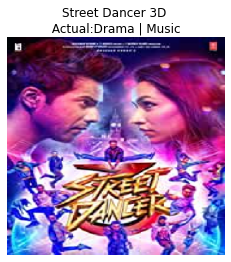

In [ ]:
prediction('street.jpg')
plt.title('Street Dancer 3D \n Actual:Drama | Music ')

Genre Predictions:
Drama (0.676)
Romance (0.271)
Comedy (0.219)
Crime (0.153)


Text(0.5, 1.0, 'Avengers: Endgame \n Actual: Action | Adventure | Drama ')

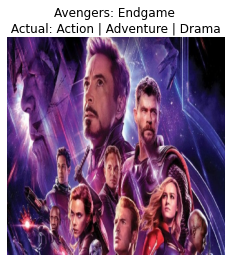

In [ ]:
prediction('endgame.jpg')
plt.title('Avengers: Endgame \n Actual: Action | Adventure | Drama ')

Genre Predictions:
Drama (0.509)
Action (0.283)
Crime (0.257)
Thriller (0.183)


Text(0.5, 1.0, 'Saaho \n Actual:  Action | Thriller  ')

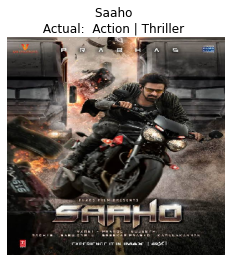

In [ ]:
prediction('saaho.jpg')
plt.title('Saaho \n Actual:  Action | Thriller  ')

Genre Predictions:
Drama (0.553)
Crime (0.3)
Action (0.227)
Thriller (0.179)


Text(0.5, 1.0, 'Super 30 \n Actual: Biography | Drama')

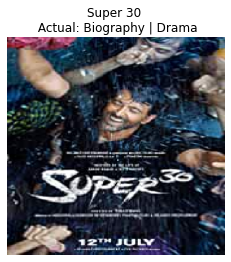

In [ ]:
prediction('30.jpg')
plt.title('Super 30 \n Actual: Biography | Drama')

# Model Evaluations

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import hamming_loss, label_ranking_loss, average_precision_score 

In [ ]:
preds = model.predict(X_test)
preds = preds.argmax(axis=-1)

In [ ]:
preds = model.predict(X_test)
preds = preds.argmax(axis=-1)

In [ ]:
test_labels = y_test.argmax(axis=-1)

# Multi-label Confusion Matrix

In [ ]:
matrix = multilabel_confusion_matrix(test_labels, preds)
print(matrix)

[[[ 901    0]
  [ 188    0]]

 [[1007    0]
  [  82    0]]

 [[1085    0]
  [   4    0]]

 [[1028    0]
  [  61    0]]

 [[ 758    0]
  [ 331    0]]

 [[1014    0]
  [  75    0]]

 [[1017    0]
  [  72    0]]

 [[   0  882]
  [   0  207]]

 [[1087    0]
  [   2    0]]

 [[1083    0]
  [   6    0]]

 [[1047    0]
  [  42    0]]

 [[1088    0]
  [   1    0]]

 [[1084    0]
  [   5    0]]

 [[1087    0]
  [   2    0]]

 [[1088    0]
  [   1    0]]

 [[1088    0]
  [   1    0]]

 [[1088    0]
  [   1    0]]

 [[1088    0]
  [   1    0]]

 [[1083    0]
  [   6    0]]

 [[1088    0]
  [   1    0]]]


In [ ]:
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.00      0.00      0.00        82
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00       331
           5       0.00      0.00      0.00        75
           6       0.00      0.00      0.00        72
           7       0.19      1.00      0.32       207
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        42
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hamming Loss
The fraction of misclassified labels

In [ ]:
h_loss = hamming_loss(test_labels, preds)
print('Hamming Loss: {}'.format(round(h_loss, 3)))

Hamming Loss: 0.81


In [ ]:
y_pred_proba = model.predict(X_test)
ap_score = average_precision_score(y_test, y_pred_proba)
print('Avg. Precision Score: {}'.format(round(ap_score, 3)))

Avg. Precision Score: nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


# Ranking Loss
Rank loss imposes a penalty on a classifier when a pair of labels is incorrectly ranked.

In [ ]:
#y_pred_proba = model.predict(X_test)
ranking_loss = label_ranking_loss(y_test, y_pred_proba)
print('Ranking Loss: {}'.format(round(ranking_loss, 3)))


Ranking Loss: 0.177
